In [1]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot, curve_plot_accuracies

In [2]:
data_names = ["newBs_TSD_BsXHc_15k_each_6trees_IDs_charge"]
#["TSD_BsXHc_50k_each_6trees_IDs_charge","TSD_BsXHc_15k_each_6trees_IDs_charge","TSD_BsXHc_15k_each_6trees_only4mom"]#["TSD_BsXHc_15k_each_6trees_IDs" ,
#"TSD_BsXHc_15k_each_6trees_charge" ,
#"TSD_BsXHc_15k_each_6trees_IDs_charge" ,
#"TSD_BsXHc_15k_each_6trees_only4mom" ]

specs = ["1024_0.001_128_0.3_4" , "1024_0.001_128_0.3_6" , "1024_0.001_128_0.3_8"]
#["1024_0.001_512_0.3_4","1024_0.001_128_0.3_4","1024_0.001_128_0.3_2","512_0.001_128_0.3_2",
 #        "2048_0.001_128_0.3_4",
  #       "1024_0.001_128_0.5_4",
   #      "1024_0.001_128_0.6_4",
    #     "4096_0.001_128_0.3_4"] # ["1024_0.001_128_0.3_14","1024_0.001_128_0.3_16"] 

now processing: /nfs/dust/belle2/user/axelheim/BranchSeparator/run_BsXHc/tb_logs/newBs_TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_128_0.3_4
Converting run events.out.tfevents.1626427246.batchg012.desy.de.8798.0

Run events.out.tfevents.1626427246.batchg012.desy.de.8798.0 is empty, didn't process it 

Converting run events.out.tfevents.1626427345.batchg012.desy.de.9411.0

- Done
151
0
1
now processing: /nfs/dust/belle2/user/axelheim/BranchSeparator/run_BsXHc/tb_logs/newBs_TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_128_0.3_6
Converting run events.out.tfevents.1626427246.batchg013.desy.de.76504.0

Run events.out.tfevents.1626427246.batchg013.desy.de.76504.0 is empty, didn't process it 

Converting run events.out.tfevents.1626427347.batchg013.desy.de.76963.0

- Done
151
0
1
now processing: /nfs/dust/belle2/user/axelheim/BranchSeparator/run_BsXHc/tb_logs/newBs_TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1626427249.batchg011.desy.de.

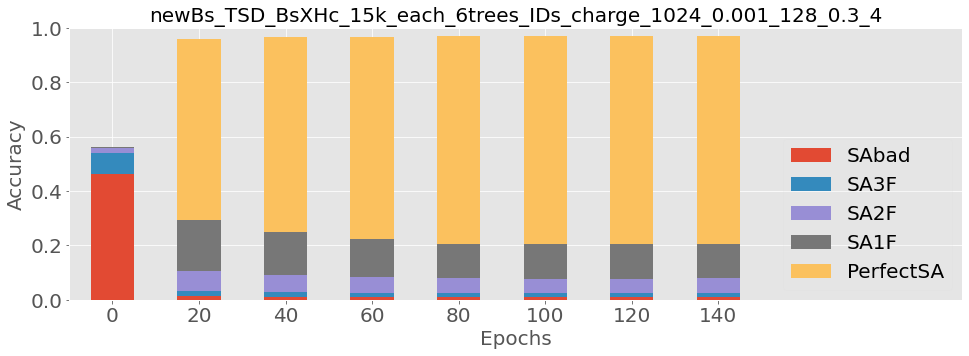

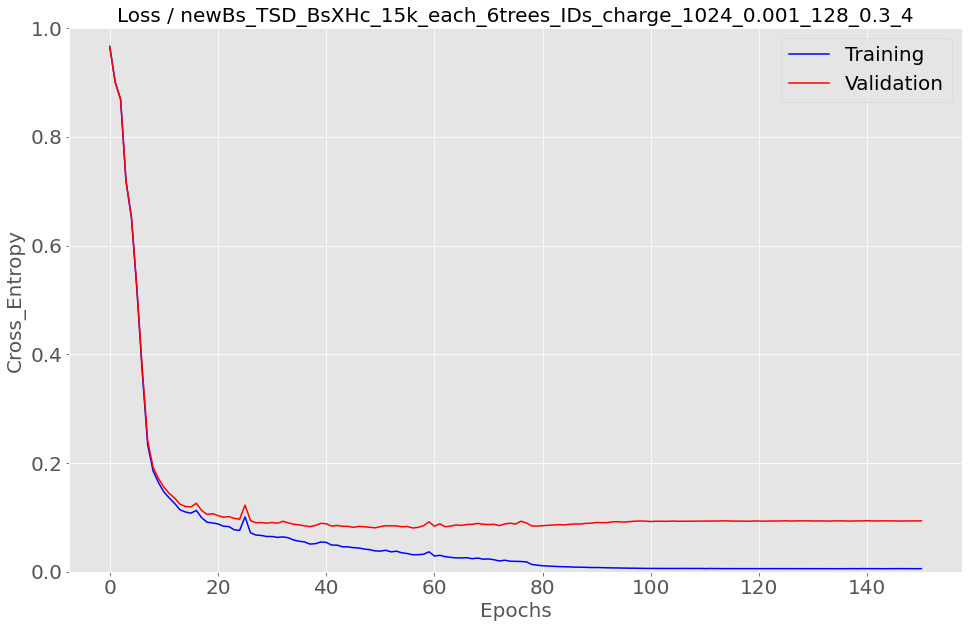

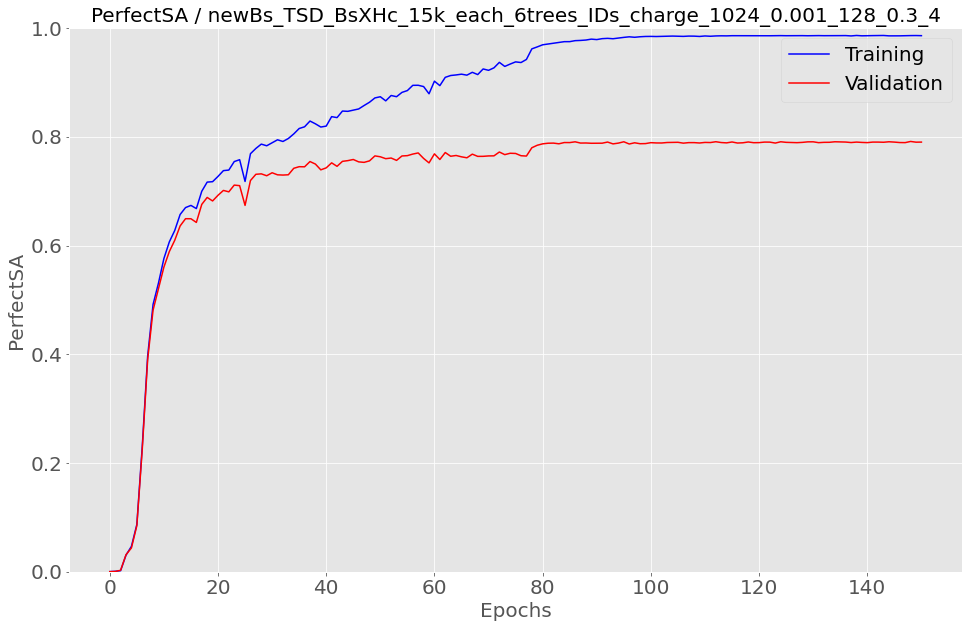

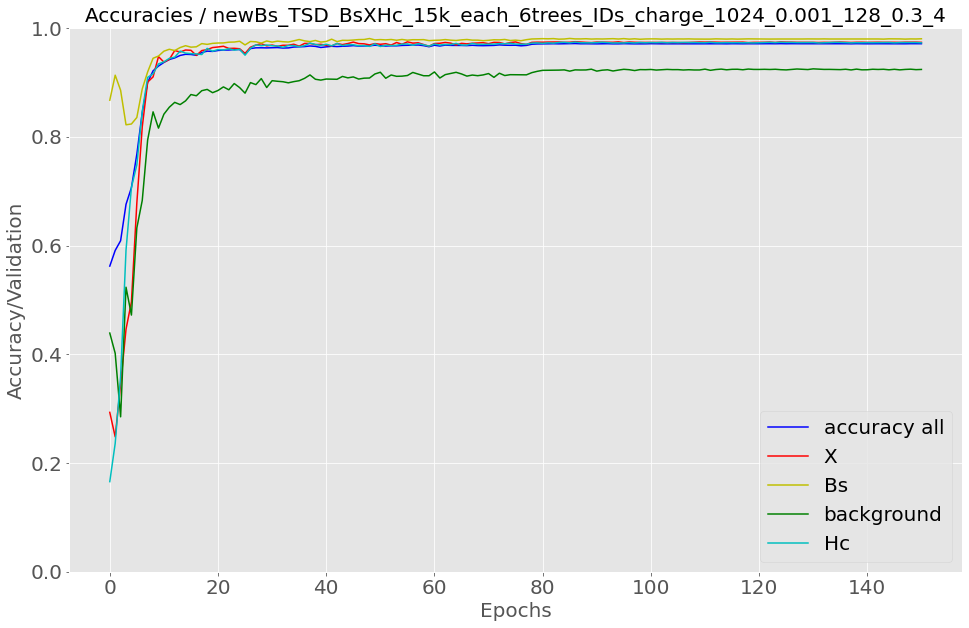

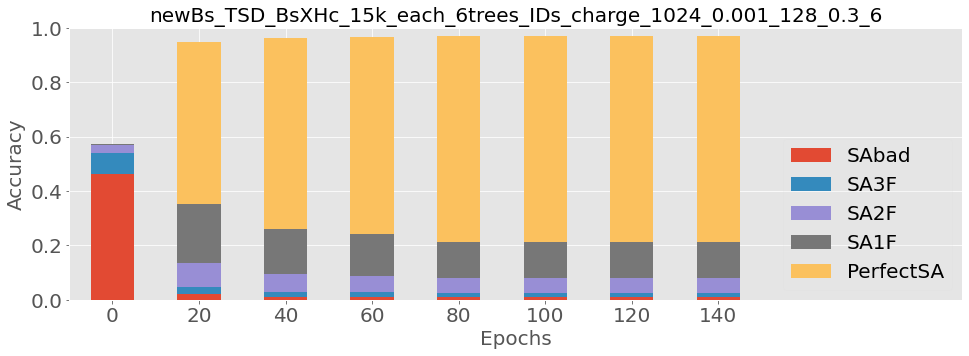

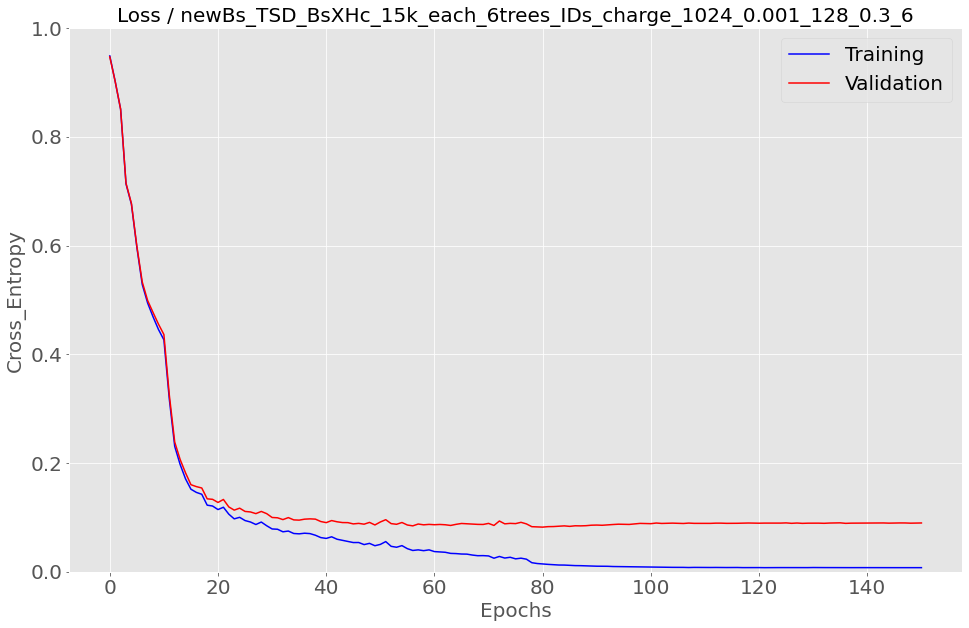

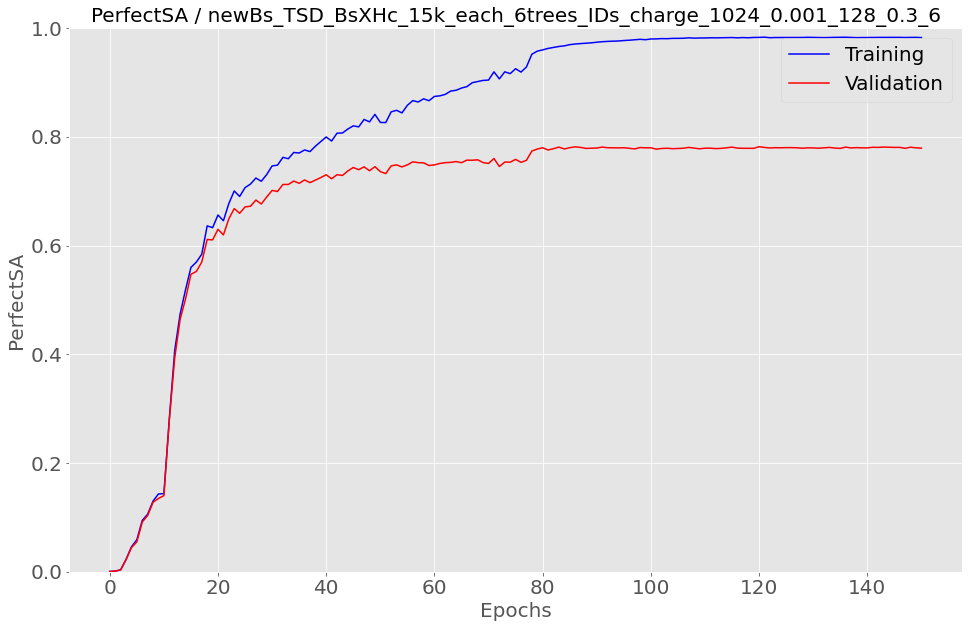

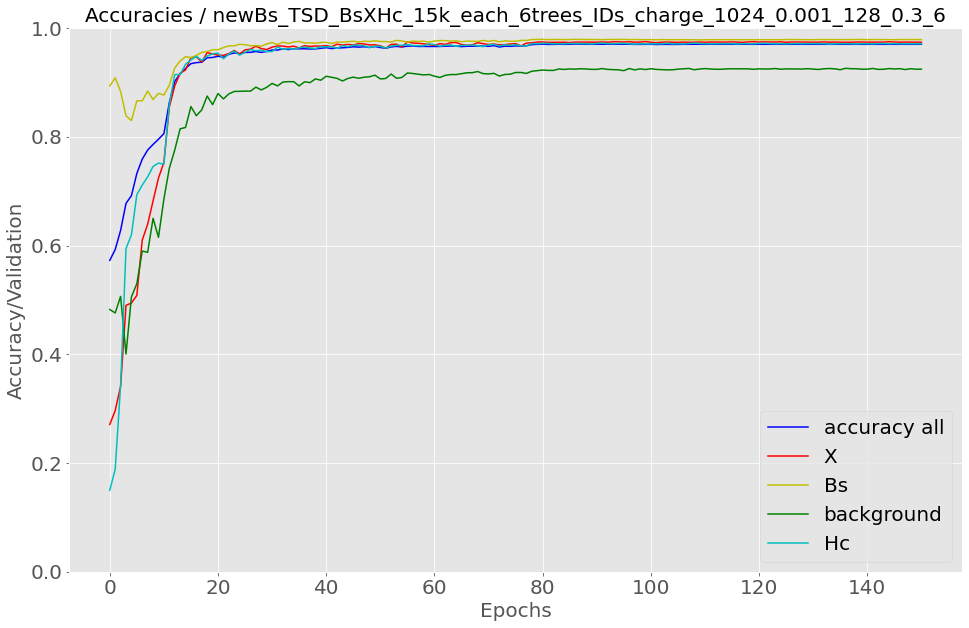

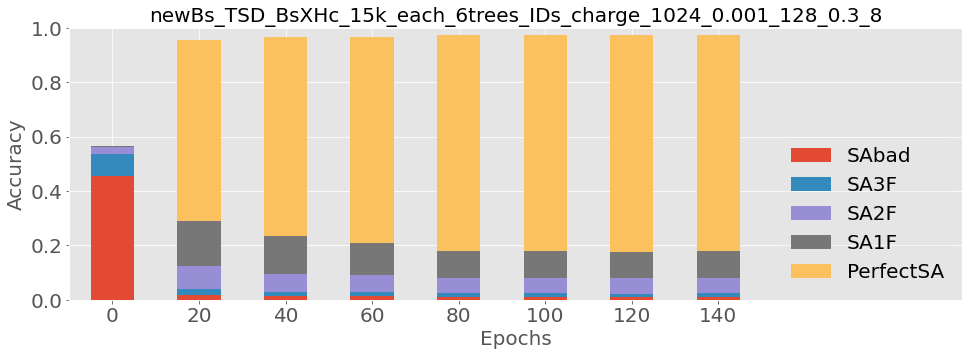

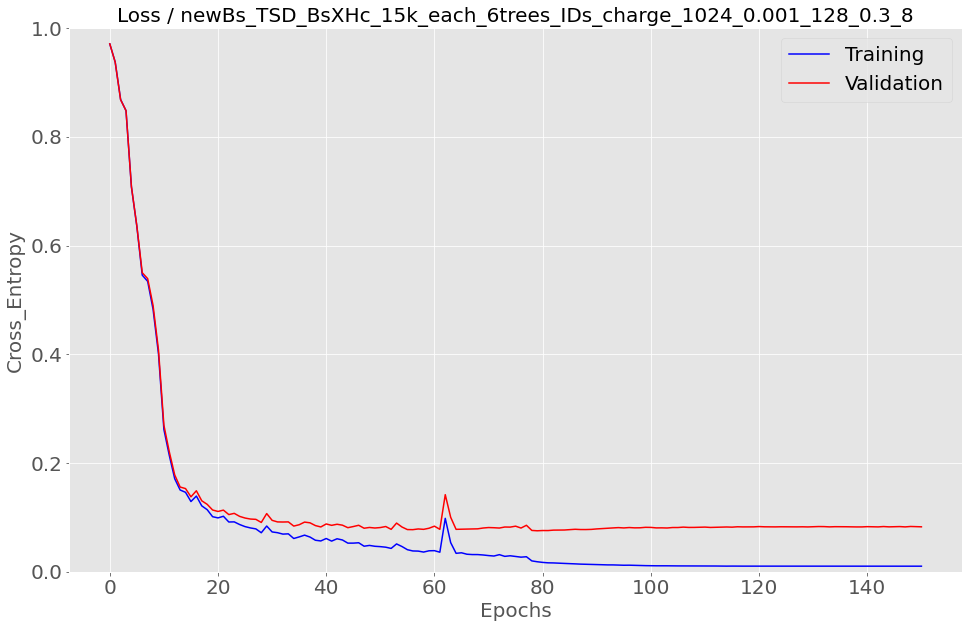

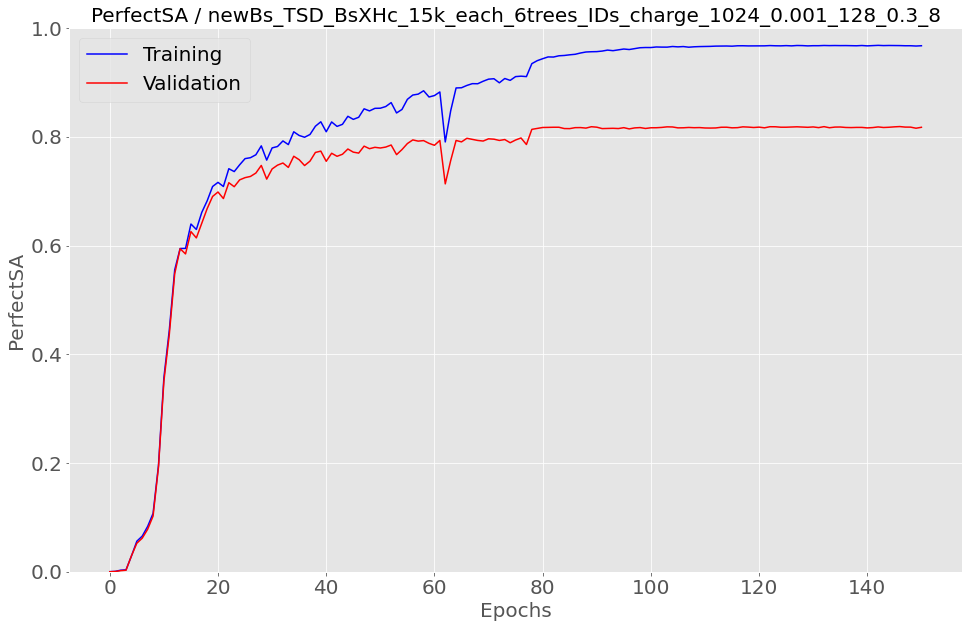

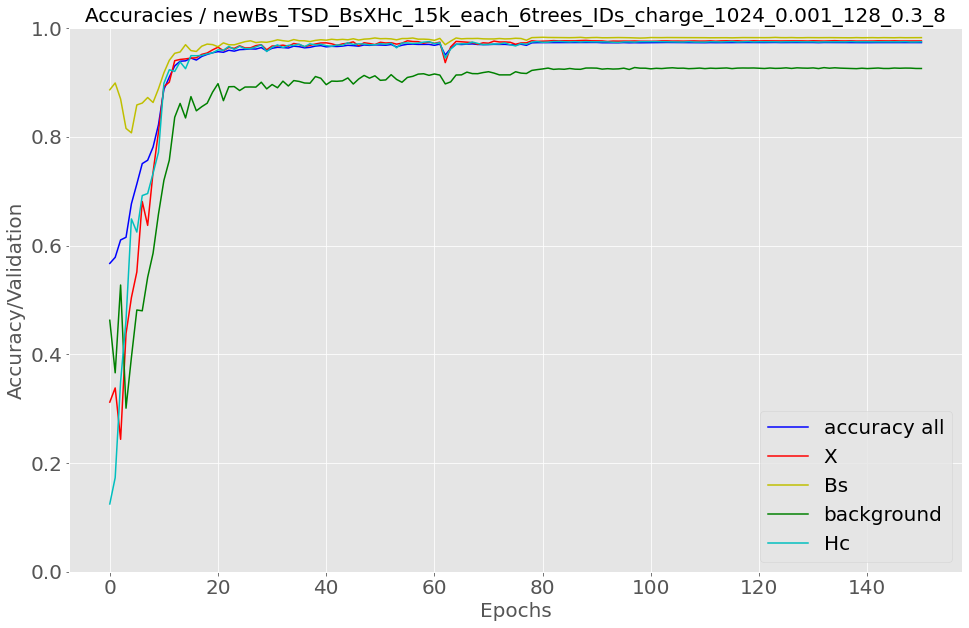

In [3]:
plotted_specs=[]
for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/run_BsXHc/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/run_BsXHc/"
        
        
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        print("now processing:",data_dir)
        if not data_dir.is_dir():
            print("dir not found in: ", data_dir, "\n skip dir")
            continue
        
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            print(epochs[i])
            
        most_epochs_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
        
        print(most_epochs_idx)
        print(len(tb_metrics))
        #if most_epochs_idx == 0:
            #continue
        longest_run = tb_metrics[most_epochs_idx]
        
        
        # the actual plots
        # bar plot
        steps = math.ceil(len(longest_run)/10)
        steps = int(math.ceil(steps / 5.0)) * 5
        multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)
        
        
        # loss plot
        loss_tr = longest_run['Cross Entropy/Training']
        loss_val = longest_run['Cross Entropy/Validation']
        curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

        # perfect SA plot
        pLCA_tr = longest_run['PerfectSA/Training']
        pLCA_val = longest_run['PerfectSA/Validation']
        curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))
        
        # plot accuracies
        acc_all = longest_run["Accuracy/Validation"]
        acc_0 = longest_run["AccClass0/Validation"]
        acc_1 = longest_run["AccClass1/Validation"]
        acc_2 = longest_run["AccClass2/Validation"]
        acc_3 = longest_run["AccClass3/Validation"]
        curve_plot_accuracies(acc_all, acc_0, acc_1, acc_2, acc_3, plot_path, ('accuracies_comparison_' + plotname_extension), 'Accuracy/Validation', ('Accuracies / ' + plotname_extension))
        
        
        plotted_specs.append(data_name + '///' + spec)
    



In [4]:
for i in range(len(plotted_specs)):
    print(plotted_specs[i])

newBs_TSD_BsXHc_15k_each_6trees_IDs_charge///1024_0.001_128_0.3_4
newBs_TSD_BsXHc_15k_each_6trees_IDs_charge///1024_0.001_128_0.3_6
newBs_TSD_BsXHc_15k_each_6trees_IDs_charge///1024_0.001_128_0.3_8
